# Visualização de dados para tomada de decisão

![](https://media.giphy.com/media/zw69pUViBZCZW/giphy.gif)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
%matplotlib inline

In [2]:
df = pd.read_csv('kaggle-survey-2017/multipleChoiceResponses.csv', encoding="ISO-8859-1")

/home/barbarabarbosa/Envs/ds36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Histogramas

Vamos analisar a idade dos cientistas de dados dessa pesquisa. Qual a idade média? Quantos anos tem a pessoa mais velha dessa pesquisa? 

Para conseguir usar o `countplot` vamos transformar `Age` para inteiro para poder enxergar os numeros melhor

In [3]:
df_copy = df.copy()

In [4]:
df.Age.isnull().sum()

331

In [5]:
# vamos preencher os nulos da variável "Age" com zeros
df['Age'] = df.Age.fillna(0).astype(int)

Vamos ver um histograma da idade dos participantes

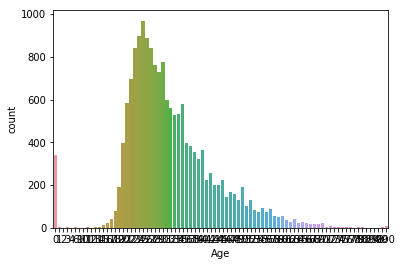

In [6]:
# Agora fazer um countplot com essa variável
_ = sns.countplot(x='Age', data=df)

Ficou horrível...

Vamos adicionar o titulo e aumentar o gráfico

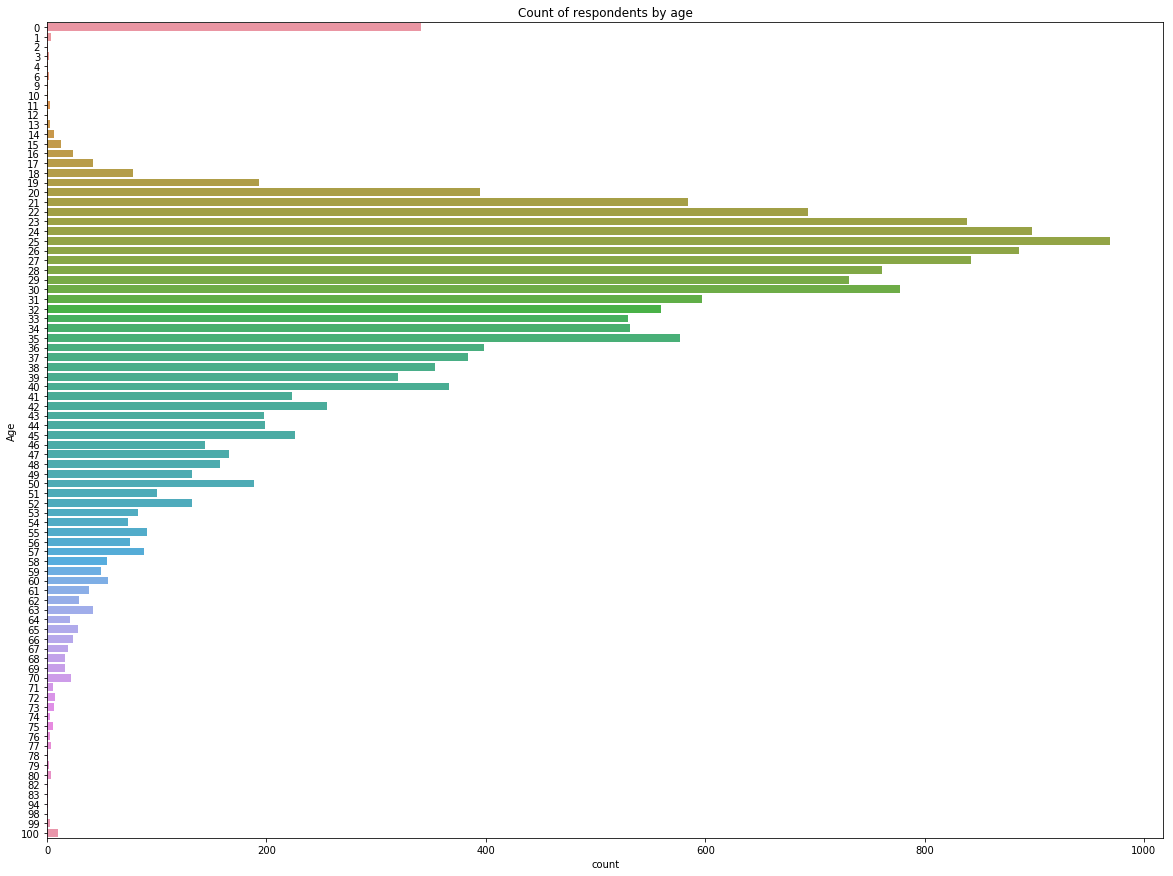

In [7]:
# Um countplot maior e na horizontal
plt.subplots(figsize=(20,15))
plot = sns.countplot(y='Age', data=df).set_title("Count of respondents by age")

E se eu não quiser um eixo x mais limpo? Só para ver a distribuição em si?

/home/barbarabarbosa/Envs/ds36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


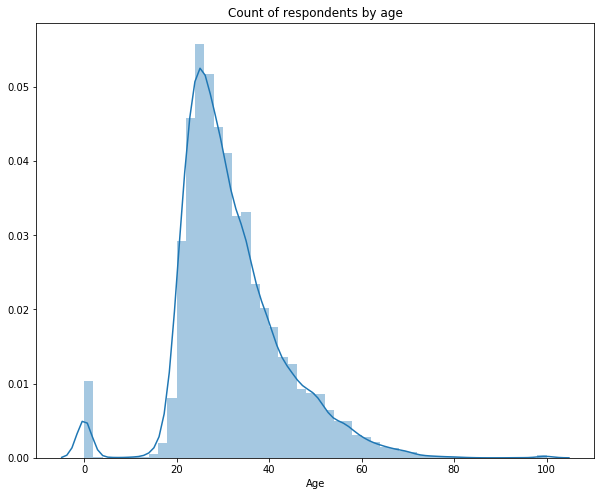

In [8]:
# agora um distplot
plt.subplots(figsize=(10,8))
_ = sns.distplot(df['Age']).set_title('Count of respondents by age')

E para remover a curva de tendencia?

/home/barbarabarbosa/Envs/ds36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


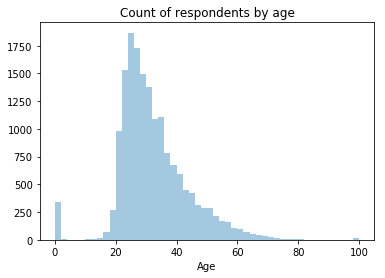

In [9]:
# remover o kde
_ = sns.distplot(df['Age'], kde=False).set_title('Count of respondents by age')

**Nota**: Distplot não aceita Nulos. O grande número de pessoas que ficaram com idade zero na verdade são pessoas que não preencheram. 

### Desafio 1

Ao invés de substituir os valores nulos pelo número zero, substitua-os pelo valor médio da idade no dataset. Plot a idade novamente. Além disso, troque as cores do gráfico. Para isso use [o guia de paletas do seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial).

![monstros_sa](https://media.giphy.com/media/zxxXYJqTlpBnO/giphy.gif)

In [13]:
df_copy.Age.isnull().sum()

331

In [18]:
df_copy['Age'] = df_copy['Age'].fillna(df_copy['Age'].mean()).astype(int)

In [21]:
sum(df_copy['Age'] < 1)

10

/home/barbarabarbosa/Envs/ds36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


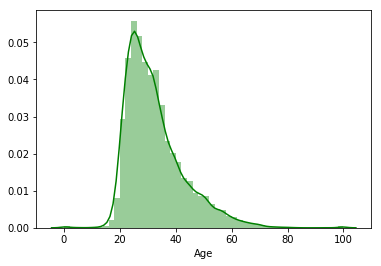

In [24]:
_ = sns.distplot(df_copy['Age'], color='g')

### Como seria o mesmo histograma usando apenas matplotlib?

/home/barbarabarbosa/Envs/ds36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


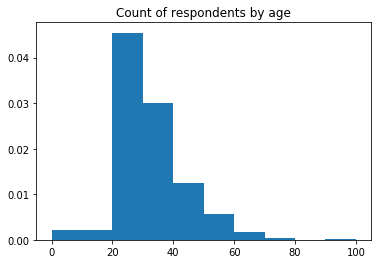

In [28]:
# com matplotlib
_ = plt.hist(df['Age'], normed=True)
_ = plt.title('Count of respondents by age')